# Road Traffic Vehicle Counting Exam

In this exam, you will use the YOLO (You Only Look Once) object detection model to analyze a video of road traffic. Your primary task is to count the number of vehicles exiting the road at each of the four exits (located at the top, bottom, left, and right of the frame). The video for this task is provided at `Datasets/YOLO_Exam_Video.mp4`.

## Objectives
- Load and process the video using OpenCV.
- Utilize the YOLO model to detect vehicles in each frame.
- Manipulate the video frames using OpenCV.
- Track vehicles as they move across the video frames.
- Count the number of vehicles exiting via the top street.
- Count the number of vehicles exiting via the bottom street.
- Count the number of vehicles exiting via the left street.
- Count the number of vehicles exiting via the right street.


## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [40]:

!pip install ultralytics
!pip install opencv-p



ERROR: Could not find a version that satisfies the requirement opencv-p (from versions: none)
ERROR: No matching distribution found for opencv-p


## Load the YOLO Model

In [41]:
import cv2
from ultralytics import YOLO,solutions

You will first need to load the YOLO model, there is a custom model for this exam called `YOLO_Model.pt` under Datasets file ⚠️ PLEASE USE THIS MODEL AND DO NOT USE ANY OTHER MODEL ⚠️.
Write the code to load the YOLO model below:

In [42]:
model = YOLO('yolov8n.pt') #importing your model takes time and my runtime RAM keeps disconnecting
                           #can't keep try the code if i don't have model

## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

In [43]:
cap = cv2.VideoCapture('/content/KhaledAlduwaysan_Video.mp4')

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [44]:
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)
frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(height, width, fps, frames)

1080 1920 29.97002997002997 779.0


## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes, specified Region of Interest rectangle (ROI) and the counted vehicles on each sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [45]:
output_path = "Khaled_YOLO_Output.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

## Expermint to get the `(x1, y1, x2, y2)` of the ROI

### Hint
When defining the Regions of Interest (ROIs) for detecting vehicles exiting the road, consider the coordinates that outline the relevant areas. These coordinates can be specified as `(x1, y1, x2, y2)`, where `(x1, y1)` is the top-left corner and `(x2, y2)` is the bottom-right corner of the rectangle.

Experiment with different coordinates to accurately cover the streets where vehicles exit. Visualize these ROIs by drawing rectangles on a frame of the video and adjust the coordinates as needed until you capture the desired areas effectively.

In [46]:
top_ROI = (0.5*width,height*0.25,0.25*width, height*0.25)     #i moved the box to the middle so we can see the object go out of it
bottom_ROI = (0.75*width, height*0.75,0.5*width, height*0.75)
left_ROI = (0, 0.66*height, 0, 0.3*height)
right_ROI = (width, 0.66*height, width, height*0.3)

regions = [top_ROI,bottom_ROI,left_ROI,right_ROI]  #https://docs.ultralytics.com/guides/region-counting/#what-are-some-real-world-applications-of-object-counting-in-regions
print(top_ROI)
print(left_ROI)
print(bottom_ROI)
print(right_ROI)

(960.0, 270.0, 480.0, 270.0)
(0, 712.8000000000001, 0, 324.0)
(1440.0, 810.0, 960.0, 810.0)
(1920, 712.8000000000001, 1920, 324.0)


In [47]:
#this sketch was drawn by me
#correction* the two main line these are entrance not the exits

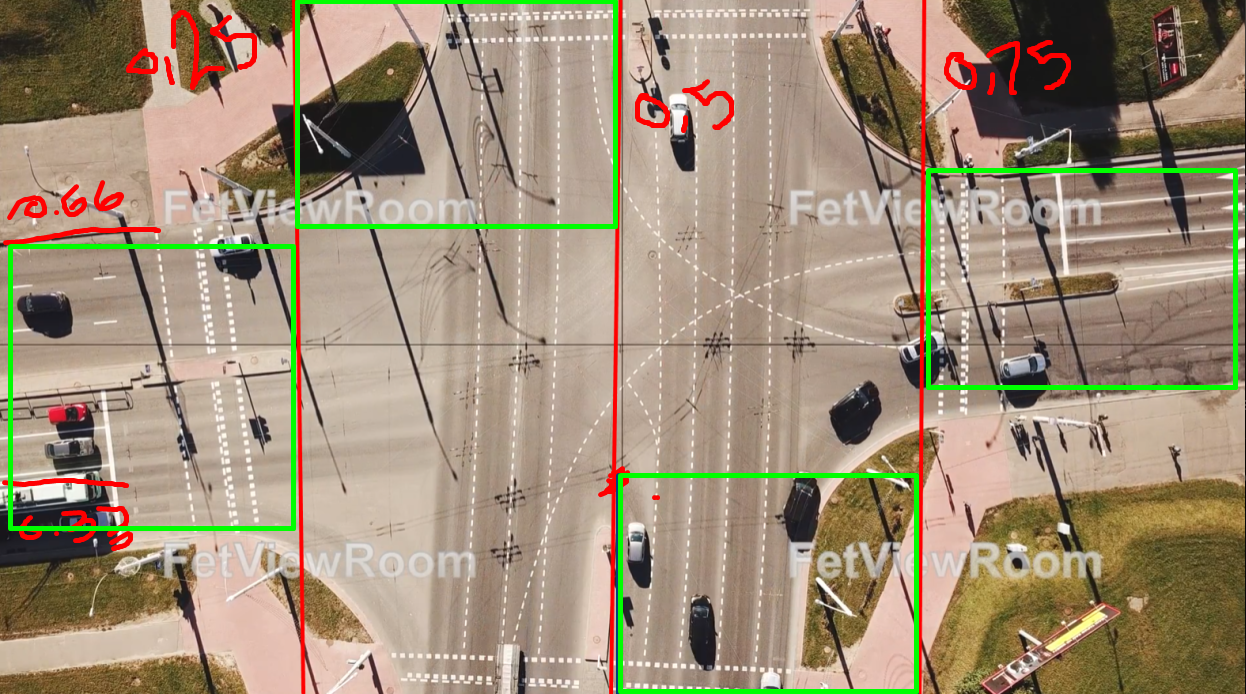

## Process Video Frames and Identify Vehicles Left the Road Form Each Street

For each frame in the video, use the YOLO model to detect and track vehicles. You will need to write a loop that processes each frame and applies the YOLO model.

In each frame, after detecting the vehicles, determine whether they exited the road via the top, bottom, left, or right street. You can use the positions of the bounding boxes provided by YOLO to do this.

- The video should display bounding boxes around the detected objects.
- The video should display your name on the top.
- It should display the calculated center of each vehicle.
- The video should display the confidence score, alongside the object ID and class ID of each detected and tracked object.
- The video should display the rectangles representing the regions where you count the vehicles that have crossed and exited.
- The video should display the number of vehicles that exited via the top street.
- The video should display the number of vehicles that exited via the bottom street.
- The video should display the number of vehicles that exited via the left street.
- The video should display the number of vehicles that exited via the right street.

In [48]:
# counter = solutions.ObjectCounter(
#     view_img=True,
#     reg_pts= top_ROI,
#     names=model.names,
#     draw_tracks=True,
#     line_thickness=2,
# )
# counter = solutions.ObjectCounter(
#     view_img=True,
#     reg_pts= bottom_ROI,
#     names=model.names,
#     draw_tracks=True,
#     line_thickness=2,
# )

# #https://docs.ultralytics.com/guides/object-counting/#real-world-applications

In [49]:
# left_count, right_count, top_count, bottom_count = 0, 0, 0, 0
# stop =0
# while cap.isOpened() & (stop != 100):
#     frame_exist, frame = cap.read()
#     if not frame_exist:
#         break

#     tracks = model.track(frame, persist=True, show=False)
#     frame = counter.start_counting(frame, tracks)
#     cv2.putText(frame, "Khaled Alduwaysan", (width - 400, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#     out.write(frame)
#     stop+=1

# # Release resources
# cap.release()
# out.release()
#                                            # i couldn't draw the the exist boxes at ones only can be one couldn't use a list of regions

In [50]:
top_count , bottom_count, left_count, right_count = 0, 0, 0, 0
color = (160, 32, 240)
thickness = 2

obj_seen = []
while cap.isOpened() :
    frame_exist, frame = cap.read()
    if not frame_exist:
        break

    # Track objects in the frame
    tracks = model.track(frame, persist=True, show=False)

    for track in tracks:
        boxes = track.boxes.xyxy
        confidences = track.boxes.conf
        class_ids = track.boxes.cls
        cv2.putText(frame, "Khaled Alduwaysan", (width - 400, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


        for box, conf, class_id in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = map(int, box.cpu().numpy())
            conf = float(conf.cpu().numpy())
            class_id = int(class_id.cpu().numpy())

            box_center_x = (x1 + x2) // 2
            box_center_y = (y1 + y2) // 2

            if top_ROI[1] > box_center_y & class_id not in obj_seen: #exited from
                top_count += 1
                obj_seen.append(class_id)
            elif bottom_ROI[1] < box_center_y & class_id not in obj_seen:
                bottom_count += 1
                obj_seen.append(class_id)
            elif left_ROI[0] > box_center_x & class_id not in obj_seen:
                left_count += 1
                obj_seen.append(class_id)
            elif right_ROI[0] < box_center_x & class_id not in obj_seen:
                right_count += 1
                obj_seen.append(class_id)


            label = f'{model.names[class_id]}: {conf:.2f}'
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)#put text above object

            cv2.line(frame, (int(top_ROI[0]), int(top_ROI[1])), (int(top_ROI[2]), int(top_ROI[3])), (0, 0, 255), 2)  # top line
            cv2.line(frame, (int(bottom_ROI[0]), int(bottom_ROI[1])), (int(bottom_ROI[2]), int(bottom_ROI[3])), (0, 0, 255), 2)  # bottom line
            cv2.line(frame, (int(left_ROI[0]), int(left_ROI[1])), (int(left_ROI[2]), int(left_ROI[3])), (0, 0, 255), 2)  # left
            cv2.line(frame, (int(right_ROI[0]), int(right_ROI[1])), (int(right_ROI[2]), int(right_ROI[3])), (0, 0, 255), 2)  # right

            cv2.putText(frame, f"TOP counter: {top_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(frame, f"BOTTOM counter: {bottom_count}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(frame, f"LEFT counter: {left_count}", (width - 400, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(frame, f"RIGHT counter: {right_count}", (width - 400, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


            out.write(frame)




cap.release()
out.release()










0: 384x640 4 traffic lights, 12.5ms
Speed: 2.7ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 traffic lights, 10.7ms
Speed: 4.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 traffic lights, 10.9ms
Speed: 17.7ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 traffic lights, 7.6ms
Speed: 3.2ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 traffic lights, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 traffic lights, 6.9ms
Speed: 2.3ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 traffic lights, 7.7ms
Speed: 2.4ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 traffic lights, 19.5ms
Speed: 3.2ms preprocess, 19.5ms 

## Save and Submit Your Work

Submit both the notebook and the output video

> Add blockquote

> Add blockquote



